In [1]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

def max_difference_loss(output, target):
    # Assuming output and target are 2D tensors (batch_size, num_elements)
    diff = T.abs(output - target)
    max_diff= T.max(diff)
    return T.max(max_diff)

In [12]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
not_nn = nn.Linear(10, 10, bias=False)
not_nn2 = nn.Linear(10, 10, bias=False)


optimizer = T.optim.AdamW(not_nn.parameters(), 0.0001)
optimizer2 = T.optim.AdamW(not_nn2.parameters(), 0.0001)
for i in range(30000):
    optimizer.zero_grad()
    optimizer2.zero_grad()
    input1 = T.rand(10)

    loss = (max_difference_loss(input1, not_nn(not_nn(input1))))
    loss2 = (F.mse_loss(input1, not_nn2(not_nn2(input1))))


    if i % 5000==0:
        print("loss: ", loss)
        print('loss2: ',loss2)
    loss.backward()
    loss2.backward()
    optimizer.step()
    optimizer2.step()

loss:  tensor(0.9033, grad_fn=<MaxBackward1>)
loss2:  tensor(0.3052, grad_fn=<MseLossBackward0>)
loss:  tensor(0.6436, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0466, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1739, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0136, grad_fn=<MseLossBackward0>)
loss:  tensor(0.3061, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0048, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1363, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0005, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0943, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0002, grad_fn=<MseLossBackward0>)


In [45]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from src.reasoner_mod import *

reasoner = ModifiedReasonerHead(emb_size=10, hidden_size=16)
reasoner2 = ModifiedReasonerHead(emb_size=10, hidden_size=16)
reasoner3 = ModifiedReasonerHead(emb_size=10, hidden_size=16)
reasoner4 = ModifiedReasonerHead(emb_size=10, hidden_size=16)

and_nn = reasoner.and_nn
and_nn2 = reasoner2.and_nn
and_nn3 = reasoner3.and_nn
and_nn4 = reasoner4.and_nn
optimizer = T.optim.AdamW(and_nn.parameters(), 0.0001)
optimizer2 = T.optim.AdamW(and_nn2.parameters(), 0.0001)
optimizer3 = T.optim.AdamW(and_nn3.parameters(), 0.0001)
optimizer4 = T.optim.AdamW(and_nn4.parameters(), 0.0001)
for i in range(100000):
    optimizer.zero_grad()
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    optimizer4.zero_grad()
    input1 = T.rand(10)

    loss = (max_difference_loss(input1, and_nn(im_mod(input1, input1))))

    loss2 = (F.mse_loss(input1, and_nn2(im_mod(input1, input1))))

    loss3 = F.l1_loss(input1, and_nn3(im_mod(input1,input1)))
    x= F.softmax(and_nn4(im_mod(input1,input1)))
    loss4 = torch.max(x) - torch.mean(x)

    if i % 5000==0:
        print("loss: ", loss)
        print('loss2: ',loss2)
        print('loss3', loss3)
        print('loss4', loss4)
        print()

    loss.backward()
    loss2.backward()
    loss3.backward()
    loss4.backward()
    optimizer.step()
    optimizer2.step()
    optimizer3.step()
    optimizer4.step()


/tmp/ipykernel_3165/1596761678.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x= F.softmax(and_nn4(im_mod(input1,input1)))


loss:  tensor(1.0892, grad_fn=<MaxBackward1>)
loss2:  tensor(0.2561, grad_fn=<MseLossBackward0>)
loss3 tensor(0.5601, grad_fn=<L1LossBackward0>)
loss4 tensor(0.0283, grad_fn=<SubBackward0>)

loss:  tensor(0.1094, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0030, grad_fn=<MseLossBackward0>)
loss3 tensor(0.0368, grad_fn=<L1LossBackward0>)
loss4 tensor(0.0051, grad_fn=<SubBackward0>)

loss:  tensor(0.0507, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0009, grad_fn=<MseLossBackward0>)
loss3 tensor(0.0155, grad_fn=<L1LossBackward0>)
loss4 tensor(0.0036, grad_fn=<SubBackward0>)

loss:  tensor(0.0574, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0003, grad_fn=<MseLossBackward0>)
loss3 tensor(0.0209, grad_fn=<L1LossBackward0>)
loss4 tensor(0.0023, grad_fn=<SubBackward0>)

loss:  tensor(0.0532, grad_fn=<MaxBackward1>)
loss2:  tensor(0.0005, grad_fn=<MseLossBackward0>)
loss3 tensor(0.0173, grad_fn=<L1LossBackward0>)
loss4 tensor(0.0030, grad_fn=<SubBackward0>)

loss:  tensor(0.0634, grad_fn=<MaxBackward1>)

In [42]:
input1 = T.rand(10)

print(input1)
print()
output1 = and_nn(im_mod(input1, input1))
output2 = and_nn2(im_mod(input1, input1))
output3 = and_nn3(im_mod(input1, input1))

print(max_difference_loss(output1, input1))
print(max_difference_loss(output2, input1))
print(max_difference_loss(output3, input1))



tensor([0.8047, 0.4910, 0.0637, 0.3009, 0.5346, 0.2209, 0.9889, 0.7555, 0.1164,
        0.4491])

tensor(0.0205, grad_fn=<MaxBackward1>)
tensor(0.0020, grad_fn=<MaxBackward1>)
tensor(0.0082, grad_fn=<MaxBackward1>)


In [ ]:
top = trained_reasoner.top_concept[0]
bot = trained_reasoner.bot_concept[0]
optimizer = T.optim.AdamW( trained_reasoner.and_nn.parameters(), 0.0001)
losses=[]
for i in range(15000):
    optimizer.zero_grad()

    encoder = encoders[int(np.round(random() * (len(encoders ) - 1) , 0))]
    input1 = encoder.concepts[ int(np.round( random() * encoder.n_concepts , 0)-1) ] 

    encoder = encoders[int(np.round(random() * (len(encoders ) - 1) , 0))]
    input2 = encoder.concepts[ int(np.round( random() * encoder.n_concepts , 0)-1) ] 

    encoder = encoders[int(np.round(random() * (len(encoders ) - 1) , 0))]
    input3 = encoder.concepts[ int(np.round( random() * encoder.n_concepts , 0) - 1) ] 

    loss = F.mse_loss(input1, trained_reasoner.and_nn(im_mod(input1,input1)))
    loss += F.mse_loss(input2, trained_reasoner.and_nn(im_mod(input2,input2)))
    loss += F.mse_loss(input3, trained_reasoner.and_nn(im_mod(input3,input3)))

    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))) , trained_reasoner.and_nn( im_mod (trained_reasoner.and_nn(im_mod(input1,input2)), input3 ) ))
    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input2, trained_reasoner.and_nn(im_mod(input1, input3)))) , trained_reasoner.and_nn( im_mod (trained_reasoner.and_nn(im_mod(input1,input2)), input3 ) ))
    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input3, trained_reasoner.and_nn(im_mod(input1, input2)))) , trained_reasoner.and_nn( im_mod (trained_reasoner.and_nn(im_mod(input3,input2)), input1 ) ))
    
    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input1,input3)) , trained_reasoner.and_nn(im_mod(input3,input1)))
    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input3,input2)) , trained_reasoner.and_nn(im_mod(input2,input3)))
    loss += F.mse_loss(trained_reasoner.and_nn(im_mod(input2,input1)) , trained_reasoner.and_nn(im_mod(input1,input2)))

    losses.append(loss.item())

    if i%5000==0:
        print("loss: ", loss)
    loss.backward()
    optimizer.step()

import matplotlib.pyplot as plt

plt.plot(losses)


In [4]:
cd ..

/home/janek/reasonable-embeddings


In [5]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from src.reasoner_mod import *

reasoner = ModifiedReasonerHead(emb_size=10, hidden_size=16)
reasoner.load_state_dict(torch.load('local/out/exp/20240630T144632/reasoner.pt'))

<All keys matched successfully>

In [6]:
from src.generate import *
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)


In [8]:
embs = [ModifiedEmbeddingLayer.from_onto(train_onto[0], emb_size=10)]

In [7]:
and_nn = reasoner.and_nn
bot = reasoner.bot_concept
top = reasoner.top_concept
sub_nn = reasoner.sub_nn
not_nn = reasoner.not_nn

In [9]:
encoder = embs[int(np.round(random.random() * (len(embs) - 1), 0))]
input1 = encoder.concepts[int(np.round(random.random() * encoder.n_concepts, 0) - 1)]
input2 = encoder.concepts[int(np.round(random.random() * encoder.n_concepts, 0) - 1)]
input3 = encoder.concepts[int(np.round(random.random() * encoder.n_concepts, 0) - 1)]


In [31]:
loss = 0
a = T.tensor([1.0 for i in range(7)]).unsqueeze(1)
one = T.ones_like((sub_nn(im_mod(input1, top[0]))))
print(F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input1, top[0]))), one, reduction='mean'))
print(F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], top[0]))), one, reduction='sum'))

loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input1, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input3, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input2, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], top[0]))), one, reduction='mean')

#  ⊥ ⊑ A -> True
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input1))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input2))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input3))), one, reduction='mean')

print(loss)

tensor(0.3133, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3133, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.1929, grad_fn=<AddBackward0>)


In [35]:
T.set_printoptions(precision=6)

In [49]:
one = torch.tensor([1.])
one

tensor([1.])

In [36]:
T.sigmoid(sub_nn(im_mod(input1, top[0])))

tensor([0.999977], grad_fn=<SigmoidBackward0>)

In [50]:
F.binary_cross_entropy(T.sigmoid(sub_nn(im_mod(input3, top[0]))), one, reduction='mean')

tensor(1.049047e-05, grad_fn=<BinaryCrossEntropyBackward0>)

In [37]:
T.sigmoid(sub_nn(im_mod(input2, top[0])))

tensor([0.999967], grad_fn=<SigmoidBackward0>)

In [40]:
T.sigmoid(sub_nn(im_mod(input2, top[0])))

tensor([0.999967], grad_fn=<SigmoidBackward0>)

In [ ]:
loss = 0
a = T.tensor([1.0 for i in range(7)]).unsqueeze(1)
one = T.ones_like(T.sigmoid(sub_nn(im_mod(input1, top[0]))))
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input1, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input3, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(input2, top[0]))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], top[0]))), one, reduction='mean')

#  ⊥ ⊑ A -> True
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input1))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input2))), one, reduction='mean')
loss += F.binary_cross_entropy_with_logits(T.sigmoid(sub_nn(im_mod(bot[0], input3))), one, reduction='mean')

print(loss)

In [18]:
loss = 0

loss += (1 - T.sigmoid(sub_nn(im_mod(input1, top[0])))).sum()
loss += (1 - T.sigmoid(sub_nn(im_mod(input2, top[0])))).sum()
loss += (1 - T.sigmoid(sub_nn(im_mod(input3, top[0])))).sum()

print(loss)

tensor(6.6161e-05, grad_fn=<AddBackward0>)


In [23]:
loss = 0
a = T.tensor([1.0 for i in range(7)]).unsqueeze(1)
losses= []
one = T.ones_like(T.sigmoid(sub_nn(im_mod(input1, top[0]))))
losses.append(T.sigmoid(sub_nn(im_mod(input1, top[0]))))
losses.append(T.sigmoid(sub_nn(im_mod(input3, top[0]))))
losses.append(T.sigmoid(sub_nn(im_mod(input2, top[0]))))
losses.append(T.sigmoid(sub_nn(im_mod(bot[0], top[0]))))

#  ⊥ ⊑ A -> True
losses.append(T.sigmoid(sub_nn(im_mod(bot[0], input1))))
losses.append(T.sigmoid(sub_nn(im_mod(bot[0], input2))))
losses.append(T.sigmoid(sub_nn(im_mod(bot[0], input3))))
losses = T.stack(losses, dim=0)
print(F.binary_cross_entropy_with_logits(losses,a, reduction='mean'))

tensor(0.3133, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [ ]:
				# Prawo wyłączonego środka: A ⊔ ¬A = T
		# loss += F.mse_loss(top[0], or_nn(im_mod(input1, not_nn(input1))))
		# loss += F.mse_loss(top[0], or_nn(im_mod(input2, not_nn(input2))))
		# loss += F.mse_loss(top[0], or_nn(im_mod(input3, not_nn(input3))))

		# loss += F.mse_loss(top[0], or_nn(im_mod(not_nn(input1), input1)))
		# loss += F.mse_loss(top[0], or_nn(im_mod(not_nn(input2), input2)))
		# loss += F.mse_loss(top[0], or_nn(im_mod(not_nn(input3), input3)))

		# # Prawa de Morgana: ¬(A ⊔ B) = ¬A ⊓ ¬B
		# loss += F.mse_loss(not_nn(or_nn(im_mod(input1, input2))), 
		# 				and_nn(im_mod(not_nn(input1), not_nn(input2))))
		# # Przykład 2
		# loss += F.mse_loss(not_nn(or_nn(im_mod(input2, input3))), 
		# 				and_nn(im_mod(not_nn(input2), not_nn(input3))))
		# # Przykład 3
		# loss += F.mse_loss(not_nn(or_nn(im_mod(input1, input3))), 
		# 				and_nn(im_mod(not_nn(input1), not_nn(input3))))

		# # Obustronnie zanegowana opcja: ¬(A ⊔ B) = ¬A ⊓ ¬B
		# # Przykład 1
		# loss += F.mse_loss(or_nn(im_mod(input1, input2)), 
		# 				not_nn(and_nn(im_mod(not_nn(input1), not_nn(input2)))))
		# # Przykład 2
		# loss += F.mse_loss(or_nn(im_mod(input2, input3)), 
		# 				not_nn(and_nn(im_mod(not_nn(input2), not_nn(input3)))))
		# # Przykład 3
		# loss += F.mse_loss(or_nn(im_mod(input1, input3)), 
		# 				not_nn(and_nn(im_mod(not_nn(input1), not_nn(input3)))))

		# # Prawa de Morgana: ¬(A ⊓ B) = ¬A ⊔ ¬B
		# # Przykład 1
		# loss += F.mse_loss(not_nn(and_nn(im_mod(input1, input2))), 
		# 				or_nn(im_mod(not_nn(input1), not_nn(input2))))
		# # Przykład 2
		# loss += F.mse_loss(not_nn(and_nn(im_mod(input2, input3))), 
		# 				or_nn(im_mod(not_nn(input2), not_nn(input3))))
		# # Przykład 3
		# loss += F.mse_loss(not_nn(and_nn(im_mod(input1, input3))), 
		# 				or_nn(im_mod(not_nn(input1), not_nn(input3))))

		# # Prawa absorpcji: A ⊔ (A ⊓ B) = A
		# loss += F.mse_loss(input1, or_nn(im_mod(input1, and_nn(im_mod(input1, input2)))))
		# loss += F.mse_loss(input1, or_nn(im_mod(and_nn(im_mod(input2, input1)), input2)))

		# loss += F.mse_loss(input1, or_nn(im_mod(input1, and_nn(im_mod(input1, input3)))))
		# loss += F.mse_loss(input1, or_nn(im_mod(and_nn(im_mod(input3, input1)), input3)))

		# # Dla input2
		# loss += F.mse_loss(input2, or_nn(im_mod(input2, and_nn(im_mod(input2, input1)))))
		# loss += F.mse_loss(input2, or_nn(im_mod(and_nn(im_mod(input1, input2)), input1)))
		# loss += F.mse_loss(input2, or_nn(im_mod(input2, and_nn(im_mod(input2, input3)))))
		# loss += F.mse_loss(input2, or_nn(im_mod(and_nn(im_mod(input3, input2)), input3)))

		# # Dla input3
		# loss += F.mse_loss(input3, or_nn(im_mod(input3, and_nn(im_mod(input3, input1)))))
		# loss += F.mse_loss(input3, or_nn(im_mod(and_nn(im_mod(input1, input3)), input1)))
		# loss += F.mse_loss(input3, or_nn(im_mod(input3, and_nn(im_mod(input3, input2)))))
		# loss += F.mse_loss(input3, or_nn(im_mod(and_nn(im_mod(input2, input3)), input2)))

		# # Prawa dystrybucji: A ⊔ (B ⊓ C) = (A ⊔ B) ⊓ (A ⊔ C)
		# loss += F.mse_loss(or_nn(im_mod(input1, and_nn(im_mod(input2, input3)))),
		# 				and_nn(im_mod(or_nn(im_mod(input1, input2)), or_nn(im_mod(input1, input3)))))
		# loss += F.mse_loss(or_nn(im_mod(input2, and_nn(im_mod(input1, input3)))),
        #            and_nn(im_mod(or_nn(im_mod(input2, input1)), or_nn(im_mod(input2, input3)))))
		# loss += F.mse_loss(or_nn(im_mod(input3, and_nn(im_mod(input2, input1)))),
        #            and_nn(im_mod(or_nn(im_mod(input3, input2)), or_nn(im_mod(input3, input1)))))

		# # Właściwości zbioru pustego i pełnego z OR
		# loss += F.mse_loss(input1, or_nn(im_mod(input1, bot[0])))
		# loss += F.mse_loss(input2, or_nn(im_mod(input2, bot[0])))
		# loss += F.mse_loss(input3, or_nn(im_mod(input3, bot[0])))
		# # Input po prawej stronie im_mod
		# loss += F.mse_loss(input1, or_nn(im_mod(bot[0], input1)))
		# loss += F.mse_loss(input2, or_nn(im_mod(bot[0], input2)))
		# loss += F.mse_loss(input3, or_nn(im_mod(bot[0], input3)))

		# # Input po lewej stronie im_mod
		# loss += F.mse_loss(top[0], or_nn(im_mod(input1, top[0])))
		# loss += F.mse_loss(top[0], or_nn(im_mod(input2, top[0])))
		# loss += F.mse_loss(top[0], or_nn(im_mod(input3, top[0])))
		# # Input po prawej stronie im_mod
		# loss += F.mse_loss(top[0], or_nn(im_mod(top[0], input1)))
		# loss += F.mse_loss(top[0], or_nn(im_mod(top[0], input2)))
		# loss += F.mse_loss(top[0], or_nn(im_mod(top[0], input3)))

		# # Właściwości kommutatywności i łączności dla OR
		# loss += F.mse_loss(or_nn(im_mod(input1, input2)), or_nn(im_mod(input2, input1)))  # A ⊔ B = B ⊔ A
		# loss += F.mse_loss(or_nn(im_mod(input3, input1)), or_nn(im_mod(input1, input3)))  # A ⊔ B = B ⊔ A
		# loss += F.mse_loss(or_nn(im_mod(input2, input3)), or_nn(im_mod(input3, input2)))  # A ⊔ B = B ⊔ A

		# loss += F.mse_loss(or_nn(im_mod(input1, or_nn(im_mod(input2, input3)))),
		# 				or_nn(im_mod(or_nn(im_mod(input1, input2)), input3)))  # A ⊔ (B ⊔ C) = (A ⊔ B) ⊔ C
		# loss += F.mse_loss(or_nn(im_mod(input3, or_nn(im_mod(input1, input2)))),
		# 				or_nn(im_mod(or_nn(im_mod(input1, input3)), input2)))  # A ⊔ (B ⊔ C) = (A ⊔ B) ⊔ C
		# loss += F.mse_loss(or_nn(im_mod(input2, or_nn(im_mod(input1, input3)))),
		# 				or_nn(im_mod(or_nn(im_mod(input2, input3)), input1)))  # A ⊔ (B ⊔ C) = (A ⊔ B) ⊔ C


In [ ]:
# if not freeze_reasoner:
			# 	reasoner.identity_losses(encoders,freeze_reasoner, one_onto, lr_reasoner)

In [ ]:
	def identity_losses(self, encoders, frozen, lr ,one_onto=False):
		and_nn = self.and_nn
		bot = self.bot_concept
		top = self.top_concept
		sub_nn = self.sub_nn
		not_nn = self.not_nn
		# or_nn = self.or_nn 
		optimizer=T.optim.AdamW
		optimizers = []

		optimizers.append(optimizer(not_nn.parameters(), lr*2.5))
		optimizers.append(optimizer([{'params':not_nn.parameters()},
					 	   {'params':top},
						   {'params':bot}], lr))
		optimizers.append(optimizer(and_nn.parameters(), lr))

		optimizers.append(optimizer([{'params':and_nn.parameters()},
					 	   {'params':top},
						   {'params':bot}], lr))

		optimizers.append(optimizer([{'params':sub_nn.parameters()},
					 	   {'params':top},
						   {'params':bot}], lr))

		optimizers.append(optimizer(sub_nn.parameters(), lr))

		optimizers.append(optimizer([{'params':sub_nn.parameters()},
					 	   {'params':not_nn.parameters()}], lr))
				
		optimizers.append(optimizer([{'params':and_nn.parameters()},
						   {'params':bot},
						   {'params':not_nn.parameters()}], lr))

		for optim in optimizers:
			optim.zero_grad()

		encoder = encoders[int(np.round(random() * (len(encoders) - 1), 0))]
		input1 = encoder.concepts[int(np.round(random() * encoder.n_concepts, 0) - 1)]
		input2 = encoder.concepts[int(np.round(random() * encoder.n_concepts, 0) - 1)]
		input3 = encoder.concepts[int(np.round(random() * encoder.n_concepts, 0) - 1)]
		
		loss = 0

		#  A = ¬(¬(A))
		loss += F.mse_loss(input1, not_nn(not_nn(input1)))
		loss += F.mse_loss(input2, not_nn(not_nn(input2)))
		loss += F.mse_loss(input3, not_nn(not_nn(input3)))

		if not frozen:
			loss += F.l1_loss(T.matmul(not_nn.weight, not_nn.weight), T.eye(not_nn.weight.shape[1])) * 100

		loss.backward()
		optimizers[0].step()
		for optim in optimizers:
			optim.zero_grad()
		
		loss=0

		#  ⊥ = ¬T  
		if not frozen:
			loss += F.l1_loss(bot[0], not_nn(top[0]))
		#  T = ¬⊥
			loss += F.l1_loss(top[0], not_nn(bot[0]))

			loss.backward()
			optimizers[1].step()
			for optim in optimizers:
				optim.zero_grad()

		if one_onto is False:
			# A ⊓ A = A
			loss=0

			loss += F.mse_loss(input1, and_nn(im_mod(input1, input1)))
			loss += F.mse_loss(input2, and_nn(im_mod(input2, input2)))
			loss += F.mse_loss(input3, and_nn(im_mod(input3, input3)))

			# A ⊓ (B ⊓ C) = (A ⊓ B) ⊓ C 
			loss += F.mse_loss(and_nn(im_mod(input1, and_nn(im_mod(input2, input3)))), and_nn(im_mod(and_nn(im_mod(input1, input2)), input3)))
			loss += F.mse_loss(and_nn(im_mod(input2, and_nn(im_mod(input1, input3)))), and_nn(im_mod(and_nn(im_mod(input1, input2)), input3)))
			loss += F.mse_loss(and_nn(im_mod(input3, and_nn(im_mod(input1, input2)))), and_nn(im_mod(and_nn(im_mod(input3, input2)), input1)))

			# A ⊓ B = B ⊓ A
			loss += F.mse_loss(and_nn(im_mod(input1, input3)), and_nn(im_mod(input3, input1)))
			loss += F.mse_loss(and_nn(im_mod(input3, input2)), and_nn(im_mod(input2, input3)))
			loss += F.mse_loss(and_nn(im_mod(input2, input1)), and_nn(im_mod(input1, input2)))

			loss.backward()
			optimizers[2].step()
			for optim in optimizers:
				optim.zero_grad()

			loss=0

			# ⊥ = A ⊓ ¬A
			loss += F.mse_loss(bot[0], and_nn(im_mod(input1, not_nn(input1))))
			loss += F.mse_loss(bot[0], and_nn(im_mod(input2, not_nn(input2))))
			loss += F.mse_loss(bot[0], and_nn(im_mod(input3, not_nn(input3))))

			loss += F.mse_loss(bot[0], and_nn(im_mod(not_nn(input1), input1)))
			loss += F.mse_loss(bot[0], and_nn(im_mod(not_nn(input2), input2)))
			loss += F.mse_loss(bot[0], and_nn(im_mod(not_nn(input3), input3)))

			loss.backward()
			optimizers[7].step()
			for optim in optimizers:
				optim.zero_grad()

			loss =0
			# A = A ⊓ T
			loss += F.mse_loss(input1, and_nn(im_mod(input1, top[0])))
			loss += F.mse_loss(input1, and_nn(im_mod(input2, top[0])))
			loss += F.mse_loss(input3, and_nn(im_mod(input3, top[0])))

			loss += F.mse_loss(input2, and_nn(im_mod(top[0], input1)))
			loss += F.mse_loss(input2, and_nn(im_mod(top[0], input2)))
			loss += F.mse_loss(input2, and_nn(im_mod(top[0], input3)))

			# ⊥ = A ⊓ ⊥
			loss += F.mse_loss(bot[0], and_nn(im_mod(input1, bot[0])))
			loss += F.mse_loss(bot[0], and_nn(im_mod(input2, bot[0])))
			loss += F.mse_loss(bot[0], and_nn(im_mod(input3, bot[0])))

			loss += F.mse_loss(bot[0], and_nn(im_mod(bot[0], input1)))
			loss += F.mse_loss(bot[0], and_nn(im_mod(bot[0], input2)))
			loss += F.mse_loss(bot[0], and_nn(im_mod(bot[0], input3)))

			if not frozen:
				loss += F.mse_loss(bot[0], and_nn(im_mod(top[0], bot[0])))

			loss.backward()
			optimizers[3].step()
			for optim in optimizers:
				optim.zero_grad()

		#  A ⊑ T -> True
		loss=0
		loss += (1 - T.sigmoid(sub_nn(im_mod(input1, top[0])))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(input2, top[0])))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(input3, top[0])))).sum()
		if not frozen:
			loss += (1 - T.sigmoid(sub_nn(im_mod(bot[0], top[0])))).sum()

		#  ⊥ ⊑ A -> True
		loss += (1 - T.sigmoid(sub_nn(im_mod(bot[0], input1)))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(bot[0], input2)))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(bot[0], input3)))).sum()

		#  ⊥ ⊑ ⊥ -> True
		if not frozen:
			loss += (1 - T.sigmoid(sub_nn(im_mod(bot[0], bot[0])))).sum()	
		
		loss.backward()
		optimizers[4].step()
		for optim in optimizers:
			optim.zero_grad()


		#  A ⊑ A -> True
		loss=0
		loss += (1 - T.sigmoid(sub_nn(im_mod(input1, input1)))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(input2, input2)))).sum()
		loss += (1 - T.sigmoid(sub_nn(im_mod(input3, input3)))).sum()
		loss.backward()
		optimizers[5].step()
		for optim in optimizers:
			optim.zero_grad()
		#  A ⊑ ¬A -> False
		loss=0
		loss+= T.sigmoid(sub_nn(im_mod(input3, not_nn(input3)))).sum()
		loss+= T.sigmoid(sub_nn(im_mod(input2, not_nn(input2)))).sum()
		loss+= T.sigmoid(sub_nn(im_mod(input1, not_nn(input1)))).sum()

		loss.backward()
		optimizers[6].step()
		for optim in optimizers:
			optim.zero_grad()

		
		return loss

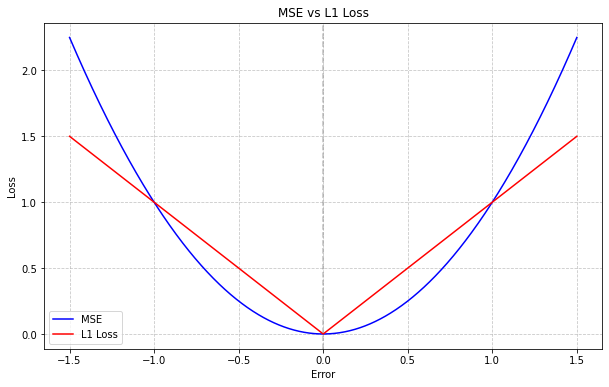

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points
x = np.linspace(-1.5, 1.5, 1000)

# Calculate MSE and L1 Loss
mse = x**2  # MSE is just x^2
l1_loss = np.abs(x)  # L1 Loss is the absolute value of x

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, mse, label='MSE', color='blue')
plt.plot(x, l1_loss, label='L1 Loss', color='red')

# Customize the plot
plt.title('MSE vs L1 Loss')
plt.xlabel('Error')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical line at x=0 for reference
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# Show the plot
plt.show()